In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
path='/content/drive/MyDrive/401/dataset_original'

In [10]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/401/dataset_original/Chest_xray_Corona_Metadata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


In [11]:
# for index,row in df.iterrows():
#   print(index,row['Label'])

# Bacteria
# df.loc[df['Label_1_Virus_category']=='bacteria']

#add coloumn
# df['Image_Path']='/content/drive/MyDrive/401/dataset_original/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'+df['X_ray_image_name']

In [ ]:
# df.loc[df['Label_1_Virus_category']=='bacteria']


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,Image_Path
1345,1345,person1019_bacteria_2950.jpeg,Pnemonia,TRAIN,streptococcus,bacteria,/content/drive/MyDrive/401/dataset_original/Co...
1347,1347,person1018_bacteria_2949.jpeg,Pnemonia,TRAIN,streptococcus,bacteria,/content/drive/MyDrive/401/dataset_original/Co...
1348,1348,person1017_bacteria_2948.jpeg,Pnemonia,TRAIN,streptococcus,bacteria,/content/drive/MyDrive/401/dataset_original/Co...
1350,1350,person1016_bacteria_2947.jpeg,Pnemonia,TRAIN,streptococcus,bacteria,/content/drive/MyDrive/401/dataset_original/Co...
1353,1353,person1014_bacteria_2945.jpeg,Pnemonia,TRAIN,streptococcus,bacteria,/content/drive/MyDrive/401/dataset_original/Co...
...,...,...,...,...,...,...,...
5859,5882,person173_bacteria_830.jpeg,Pnemonia,TEST,streptococcus,bacteria,/content/drive/MyDrive/401/dataset_original/Co...
5860,5883,person173_bacteria_829.jpeg,Pnemonia,TEST,streptococcus,bacteria,/content/drive/MyDrive/401/dataset_original/Co...
5861,5884,person172_bacteria_828.jpeg,Pnemonia,TEST,streptococcus,bacteria,/content/drive/MyDrive/401/dataset_original/Co...
5862,5885,person172_bacteria_827.jpeg,Pnemonia,TEST,streptococcus,bacteria,/content/drive/MyDrive/401/dataset_original/Co...


In [13]:
import numpy as np
import os
import pandas as pd
import cv2 as cv
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from PIL import Image


In [14]:
def load_image(path):
    for img in os.listdir(data_path):
        print("image name=",img)
        #to list all the files present inside that directory.
        image=cv.imread(os.path.join(data_path,img)) 
        # Break- is necessary here, so that only the first image is accessed,           otherwise the function will loop through all the images present inside the Bacteria folder.
        break

    return image

image name= person539_bacteria_2269.jpeg
The dimensions are 556 pixels height and 845 pixels width
The maximum pixel value is 181.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 111.9761
The standard deviation is 37.7666


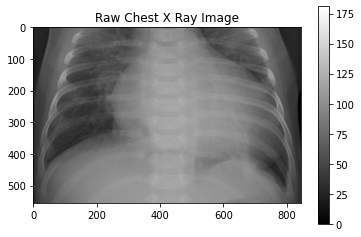

In [15]:
data_path = '/content/drive/MyDrive/401/dataset_original/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
image = load_image(data_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")

In [22]:
input_path = '/content/drive/MyDrive/401/dataset_original/Coronahack-Chest-XRay-Dataset'

metadata = pd.read_csv('/content/drive/MyDrive/401/dataset_original/Chest_xray_Corona_Metadata.csv')

summary = pd.read_csv('/content/drive/MyDrive/401/dataset_original/Chest_xray_Corona_dataset_Summary.csv')
metadata.loc[metadata['Label_1_Virus_category']=='bacteria','Label_2_Virus_category']='streptococcus'
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  2841 non-null   object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


In [23]:
metadata.sample(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
1977,1977,person1315_bacteria_3322.jpeg,Pnemonia,TRAIN,streptococcus,bacteria
2768,2768,person1667_bacteria_4418.jpeg,Pnemonia,TRAIN,streptococcus,bacteria
934,934,NORMAL2-IM-0907-0001.jpeg,Normal,TRAIN,NaN,NaN
2733,2733,person1689_bacteria_4473.jpeg,Pnemonia,TRAIN,streptococcus,bacteria
706,706,NORMAL2-IM-0500-0001.jpeg,Normal,TRAIN,NaN,NaN


In [24]:
train_df = metadata[metadata.Dataset_type == 'TRAIN'].reset_index(drop=True)
test_df = metadata[metadata.Dataset_type == 'TEST'].reset_index(drop=True)


assert train_df.shape[0] + test_df.shape[0] == metadata.shape[0]
# print(f'Train df shape: {train_df.shape}')
# print(f'Test df shape: {test_df.shape}')
print(f'Count of null values in train:\n{train_df.isnull().sum()}')
print("-"*50)
print(f'Count of null values in test:\n{test_df.isnull().sum()}')



Count of null values in train:
Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    2687
Label_1_Virus_category    1342
dtype: int64
--------------------------------------------------
Count of null values in test:
Unnamed: 0                  0
X_ray_image_name            0
Label                       0
Dataset_type                0
Label_2_Virus_category    382
Label_1_Virus_category    234
dtype: int64


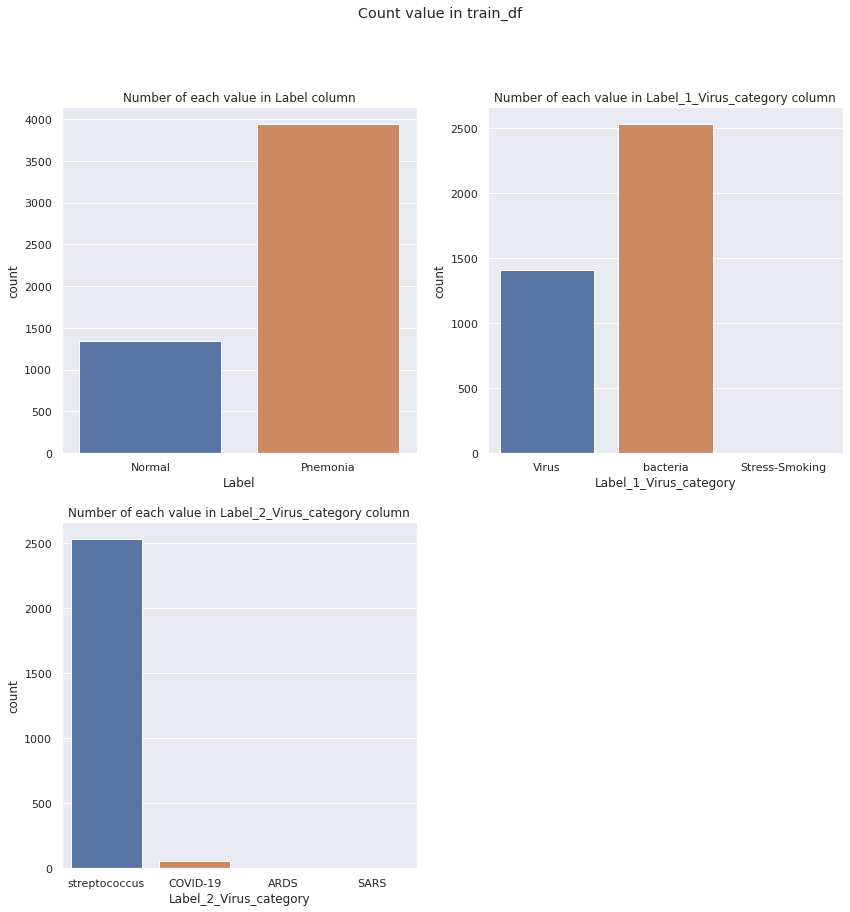

In [25]:
col = ['Label', 'Label_1_Virus_category', 'Label_2_Virus_category']
sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(14, 14))
for i in range(3):
    ax = plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=col[i], data=train_df)
    ax.set_title(f'Number of each value in {col[i]} column')
fig.suptitle('Count value in train_df')
plt.show()

In [26]:
data_gen=ImageDataGenerator(
rotation_range=10,#random rotation
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest',cval=1
)


In [27]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
import os
import cv2
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def create_directory():
    try:
        os.makedirs('../working/train/Pnemonia')
        os.makedirs('../working/train/Normal')
        os.makedirs('../working/test/Pnemonia')
        os.makedirs('../working/test/Normal')
    except:
        pass

In [38]:
create_directory()
train_data = metadata[metadata['Dataset_type'] == 'TRAIN']
test_data = metadata[metadata['Dataset_type'] == 'TEST']

In [40]:
#for train data

#COVID
train_pnemonia = '../working/train/Pnemonia/'
source_train = "/content/drive/MyDrive/401/dataset_original/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
move_train_pnemonia = train_data[ train_data['Label'] == 'Pnemonia']['X_ray_image_name'].values
for i in move_train_pnemonia:
    path = os.path.join(source_train,i)
    shutil.copy(path,train_pnemonia)
    
#Normal
train_normal = '../working/train/Normal/'
move_train_normal = train_data[train_data.Label == 'Normal']['X_ray_image_name'].values
for i in move_train_normal:
    path = os.path.join(source_train,i)
    shutil.copy(path,train_normal)
    